# Yousif Beshay - 201600601

# AES - Phase 1 

In [ ]:
import numpy as np

In [ ]:
hex1=0x00112233445566778899AABBCCDDEEFF
hex2=0xFFEEDDCCBBAA99887766554433221100
print(hex1 ^ 0x11)
hex(hex1^hex2)

88962710306127702866241727433141998


'0xffffffffffffffffffffffffffffffff'

In [ ]:
s_box = (
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
)

inv_s_box = (
    0x52, 0x09, 0x6A, 0xD5, 0x30, 0x36, 0xA5, 0x38, 0xBF, 0x40, 0xA3, 0x9E, 0x81, 0xF3, 0xD7, 0xFB,
    0x7C, 0xE3, 0x39, 0x82, 0x9B, 0x2F, 0xFF, 0x87, 0x34, 0x8E, 0x43, 0x44, 0xC4, 0xDE, 0xE9, 0xCB,
    0x54, 0x7B, 0x94, 0x32, 0xA6, 0xC2, 0x23, 0x3D, 0xEE, 0x4C, 0x95, 0x0B, 0x42, 0xFA, 0xC3, 0x4E,
    0x08, 0x2E, 0xA1, 0x66, 0x28, 0xD9, 0x24, 0xB2, 0x76, 0x5B, 0xA2, 0x49, 0x6D, 0x8B, 0xD1, 0x25,
    0x72, 0xF8, 0xF6, 0x64, 0x86, 0x68, 0x98, 0x16, 0xD4, 0xA4, 0x5C, 0xCC, 0x5D, 0x65, 0xB6, 0x92,
    0x6C, 0x70, 0x48, 0x50, 0xFD, 0xED, 0xB9, 0xDA, 0x5E, 0x15, 0x46, 0x57, 0xA7, 0x8D, 0x9D, 0x84,
    0x90, 0xD8, 0xAB, 0x00, 0x8C, 0xBC, 0xD3, 0x0A, 0xF7, 0xE4, 0x58, 0x05, 0xB8, 0xB3, 0x45, 0x06,
    0xD0, 0x2C, 0x1E, 0x8F, 0xCA, 0x3F, 0x0F, 0x02, 0xC1, 0xAF, 0xBD, 0x03, 0x01, 0x13, 0x8A, 0x6B,
    0x3A, 0x91, 0x11, 0x41, 0x4F, 0x67, 0xDC, 0xEA, 0x97, 0xF2, 0xCF, 0xCE, 0xF0, 0xB4, 0xE6, 0x73,
    0x96, 0xAC, 0x74, 0x22, 0xE7, 0xAD, 0x35, 0x85, 0xE2, 0xF9, 0x37, 0xE8, 0x1C, 0x75, 0xDF, 0x6E,
    0x47, 0xF1, 0x1A, 0x71, 0x1D, 0x29, 0xC5, 0x89, 0x6F, 0xB7, 0x62, 0x0E, 0xAA, 0x18, 0xBE, 0x1B,
    0xFC, 0x56, 0x3E, 0x4B, 0xC6, 0xD2, 0x79, 0x20, 0x9A, 0xDB, 0xC0, 0xFE, 0x78, 0xCD, 0x5A, 0xF4,
    0x1F, 0xDD, 0xA8, 0x33, 0x88, 0x07, 0xC7, 0x31, 0xB1, 0x12, 0x10, 0x59, 0x27, 0x80, 0xEC, 0x5F,
    0x60, 0x51, 0x7F, 0xA9, 0x19, 0xB5, 0x4A, 0x0D, 0x2D, 0xE5, 0x7A, 0x9F, 0x93, 0xC9, 0x9C, 0xEF,
    0xA0, 0xE0, 0x3B, 0x4D, 0xAE, 0x2A, 0xF5, 0xB0, 0xC8, 0xEB, 0xBB, 0x3C, 0x83, 0x53, 0x99, 0x61,
    0x17, 0x2B, 0x04, 0x7E, 0xBA, 0x77, 0xD6, 0x26, 0xE1, 0x69, 0x14, 0x63, 0x55, 0x21, 0x0C, 0x7D,
)

# Important Functions (Sbox - inv Sbox)

In [ ]:
# Creating S-box and its inverse

# some processing to generate the lookup tables (dictionaries)
s_box_dict={}
inv_s_box_dict={}
for i in range (len(s_box)):
  row=hex(i//16)[2:]
  col=hex(i%16)[2:]
  s_box_dict[(row,col)]="0x{:02x}".format(s_box[i])[2:]
  inv_s_box_dict[(row,col)]="0x{:02x}".format(inv_s_box[i])[2:]
print(len(s_box_dict))
s_box_dict

# Creating State
def create_state(message):
  state=np.zeros((4,4),dtype=object)
  state_bytes=[]
  for i in range(0,32,2):
    state_bytes.append(message[i:i+2])
  state=np.array(state_bytes)
  state=state.reshape(4,4)
  transposed_state=state.transpose()
  return transposed_state
def S_box(byte):
  row=byte[0]
  col=byte[1]
  transformed_val=s_box_dict[(row,col)]
  return transformed_val
def Inv_S_box(byte):
  row=byte[0]
  col=byte[1]
  original_val=inv_s_box_dict[(row,col)]
  return original_val
def convert_state_to_stream(state):
  transposed_state=state.transpose()
  stream=[]
  for row in transposed_state:
    for val in row:
      if val[:2]=="0x":
        val=val[2:]
      stream.append(val)
  stream=''.join(stream)
  return stream


256


## Testing S-Box

In [ ]:
# Testing S-Box
transformed_state=np.zeros((4,4),dtype=object)
state=create_state("6a84867cd77e12ad07ea1be895c53fa3")
for i in range(4):
  for j in range(4):
    byte=state[i,j]
    transformed_state[i,j]=S_box(byte)
stream=convert_state_to_stream(transformed_state)
print(transformed_state ,"\n",stream)

[['02' '0e' 'c5' '2a']
 ['5f' 'f3' '87' 'a6']
 ['44' 'c9' 'af' '75']
 ['10' '95' '9b' '0a']] 
 025f44100ef3c995c587af9b2aa6750a


In [ ]:
# Testing S-Box inverse
transformed_state=np.zeros((4,4),dtype=object)
state=create_state("025f44100ef3c995c587af9b2aa6750a")
for i in range(4):
  for j in range(4):
    byte=state[i,j]
    transformed_state[i,j]=Inv_S_box(byte)
stream=convert_state_to_stream(transformed_state)
print(transformed_state ,"\n",stream)

[['6a' 'd7' '07' '95']
 ['84' '7e' 'ea' 'c5']
 ['86' '12' '1b' '3f']
 ['7c' 'ad' 'e8' 'a3']] 
 6a84867cd77e12ad07ea1be895c53fa3


In [ ]:
y=S_box("f2")
x=Inv_S_box("89")
print(y,x)

89 f2


In [ ]:
message="025f44100ef3c995c587af9b2aa6750a"
state=np.zeros((4,4),dtype=int)
state_bytes=[]
for i in range(0,32,2):
  state_bytes.append(message[i:i+2])
state=np.array(state_bytes)
state=state.reshape(4,4)
transposed_state=state.transpose()



print("State : \n",state)
print("Transposed State : \n",transposed_state)

# Shifting rows
def shift_rows(state):
  ''' shift rows by values 0,1,2,3 respectively
  '''
  transposed_state=state
  shifted_state=np.zeros((4,4),dtype=object)
  shifted_state[0,0],shifted_state[0,1],shifted_state[0,2],shifted_state[0,3]=transposed_state[0,0],transposed_state[0,1],transposed_state[0,2],transposed_state[0,3]
  shifted_state[1,0],shifted_state[1,1],shifted_state[1,2],shifted_state[1,3]=transposed_state[1,1],transposed_state[1,2],transposed_state[1,3],transposed_state[1,0]
  shifted_state[2,0],shifted_state[2,1],shifted_state[2,2],shifted_state[2,3]=transposed_state[2,2],transposed_state[2,3],transposed_state[2,0],transposed_state[2,1]
  shifted_state[3,0],shifted_state[3,1],shifted_state[3,2],shifted_state[3,3]=transposed_state[3,3],transposed_state[3,0],transposed_state[3,1],transposed_state[3,2]
  return shifted_state

def inverse_shift_rows(state):
  transposed_state=state
  shifted_state=np.zeros((4,4),dtype=object)
  shifted_state[0,0],shifted_state[0,1],shifted_state[0,2],shifted_state[0,3]=transposed_state[0,0],transposed_state[0,1],transposed_state[0,2],transposed_state[0,3]
  shifted_state[1,0],shifted_state[1,1],shifted_state[1,2],shifted_state[1,3]=transposed_state[1,3],transposed_state[1,0],transposed_state[1,1],transposed_state[1,2]
  shifted_state[2,0],shifted_state[2,1],shifted_state[2,2],shifted_state[2,3]=transposed_state[2,2],transposed_state[2,3],transposed_state[2,0],transposed_state[2,1]
  shifted_state[3,0],shifted_state[3,1],shifted_state[3,2],shifted_state[3,3]=transposed_state[3,1],transposed_state[3,2],transposed_state[3,3],transposed_state[3,0]
  return shifted_state

State : 
 [['02' '5f' '44' '10']
 ['0e' 'f3' 'c9' '95']
 ['c5' '87' 'af' '9b']
 ['2a' 'a6' '75' '0a']]
Transposed State : 
 [['02' '0e' 'c5' '2a']
 ['5f' 'f3' '87' 'a6']
 ['44' 'c9' 'af' '75']
 ['10' '95' '9b' '0a']]


## Testing Shift Columns

In [ ]:
state=create_state("025f44100ef3c995c587af9b2aa6750a")
shifted_state=shift_rows(state)
final_shifted_stream=convert_state_to_stream(shifted_state)
print(final_shifted_stream)

02f3af0a0e877510c5a644952a5fc99b


In [ ]:
state=create_state("02f3af0a0e877510c5a644952a5fc99b")
shifted_state=inverse_shift_rows(state)
final_shifted_stream=convert_state_to_stream(shifted_state)
print(final_shifted_stream)

025f44100ef3c995c587af9b2aa6750a


In [ ]:
state=create_state("025f44100ef3c995c587af9b2aa6750a")
shifted=shift_rows(state)
shifted

array([['02', '0e', 'c5', '2a'],
       ['f3', '87', 'a6', '5f'],
       ['af', '75', '44', 'c9'],
       ['0a', '10', '95', '9b']], dtype=object)

In [ ]:
def multiply_hex(hex_number,multiplication_value):
  product=0x00
  if multiplication_value=="01":
    product=hex_number
  elif multiplication_value=="02":
    product=hex_number << 1
    if product > 255 :
      product=product ^ 283
  elif multiplication_value=="03":
    product=hex_number << 1
    if product > 255 :
      product=product ^ 283
    product ^= hex_number
  else:
    product=hex_number
  return hex(product)

def adv_multiply_hex(hex_number,multiplication_value):
  
  product=0x00 # iteratively calculate higher multiplications by multiplying by doubling and adding
  if multiplication_value=="09":
    product1=multiply_hex(hex_number,'02')
    product2=multiply_hex(int(product1,16),'02')
    product3=multiply_hex(int(product2,16),'02')
    product=int(product3,16) ^ hex_number
  elif multiplication_value=="0b":
    product1=multiply_hex(hex_number,'02')
    product2=multiply_hex(int(product1,16),'02')
    product3=int(product2,16) ^ hex_number
    product4=multiply_hex(product3,'02')
    product=int(product4,16) ^ hex_number
  elif multiplication_value=="0d":
    product1=multiply_hex(hex_number,'02')
    product2=int(product1,16) ^ hex_number
    product3=multiply_hex(product2,'02')
    product4=multiply_hex(int(product3,16),'02')
    product=int(product4,16) ^ hex_number
  elif multiplication_value=="0e":
    product1=multiply_hex(hex_number,'02')
    product2=int(product1,16) ^ hex_number
    product3=multiply_hex(product2,'02')
    product4=int(product3,16) ^ hex_number
    product=multiply_hex(product4,'02')
    product=int(product,16)
  return hex(product)

def multiply_column(column):
  column=column
  mix_column_matrix=[['02','03','01','01'],
                     ['01','02','03','01'],
                     ['01','01','02','03'],
                     ['03','01','01','02']]
  mix_column_matrix=np.array(mix_column_matrix)
  results=[]
  for row in mix_column_matrix:
    row_result=[]
    for i in range(4):
      byte=column[i]
      mult_val=row[i]
      result=multiply_hex(byte,mult_val)
      row_result.append(int(result,16))
    final_result=hex(row_result[0] ^ row_result[1] ^ row_result[2] ^ row_result[3])
    if len(final_result)==3:
      final_result=final_result[:2] +"0"+final_result[2:]
    results.append(final_result)
  return results

def multiply_inv_column(column):

  column=column
  inv_mix_column_matrix=[['0e','0b','0d','09'],
                        ['09','0e','0b','0d'],
                        ['0d','09','0e','0b'],
                        ['0b','0d','09','0e']]
  inv_mix_column_matrix=np.array(inv_mix_column_matrix)
  results=[]
  for row in inv_mix_column_matrix:
    row_result=[]
    for i in range(4):
      byte=column[i]
      mult_val=row[i]
      result=adv_multiply_hex(byte,mult_val)
      row_result.append(int(result,16))
    final_result=hex(row_result[0] ^ row_result[1] ^ row_result[2] ^ row_result[3])
    if len(final_result)==3:
      final_result=final_result[:2] +"0"+final_result[2:]
    results.append(final_result)
  return results


## Testing Mix Columns

In [ ]:
# Testing Mix Columns
new_state=np.zeros((4,4),dtype=object)
state=create_state("02f3af0a0e877510c5a644952a5fc99b")
print(state)
for i in range(4):
  column_hexes=[]
  column=state[:,i].tolist()
  for element in column:
    column_hexes.append(int(element,16))
  new_state[:,i]= multiply_column(column_hexes)
new_stream=convert_state_to_stream(new_state)
new_stream
print(new_state ,"\n",new_stream)

[['02' '0e' 'c5' '2a']
 ['f3' '87' 'a6' '5f']
 ['af' '75' '44' 'c9']
 ['0a' '10' '95' '9b']]
[['0xaf' '0xeb' '0xb1' '0xe7']
 ['0x1f' '0x94' '0xcb' '0x4f']
 ['0xaa' '0x53' '0x4f' '0x4a']
 ['0x4e' '0xc0' '0x87' '0xc5']] 
 af1faa4eeb9453c0b1cb4f87e74f4ac5


In [ ]:
# Testing Inverse Mix Columns
new_state=np.zeros((4,4),dtype=object)
state=create_state("af1faa4eeb9453c0b1cb4f87e74f4ac5")
for i in range(4):
  column_hexes=[]
  column=state[:,i].tolist()
  for element in column:
    column_hexes.append(int(element,16))
  new_state[:,i]= multiply_inv_column(column_hexes)
new_stream=convert_state_to_stream(new_state)
new_stream
print(new_state ,"\n",new_stream)

[['0x02' '0x0e' '0xc5' '0x2a']
 ['0xf3' '0x87' '0xa6' '0x5f']
 ['0xaf' '0x75' '0x44' '0xc9']
 ['0x0a' '0x10' '0x95' '0x9b']] 
 02f3af0a0e877510c5a644952a5fc99b


## Testing Key Addition

In [ ]:
key=0x62636363626363636263636362636363
message=0xaf1faa4eeb9453c0b1cb4f87e74f4ac5
out=key^message
hex(out)

'0xcd7cc92d89f730a3d3a82ce4852c29a6'

In [ ]:
key=0x62636363626363636263636362636363
message=0xcd7cc92d89f730a3d3a82ce4852c29a6
out=key^message
hex(out)

'0xaf1faa4eeb9453c0b1cb4f87e74f4ac5'

## AES Encrypt

I only considered one round without the key whitening at the end of round 1 as it is to be implemented in phase 2

In [ ]:
def aes_encrypt(message,key):
  # key whitening (initially)
  message = hex(message ^ key)
  transformed_state=np.zeros((4,4),dtype=object)
  # S-box
  state=create_state(message[2:])
  for i in range(4):
    for j in range(4):
      byte=state[i,j]
      transformed_state[i,j]=S_box(byte)
  # shifting rows
  shifted_state=shift_rows(transformed_state)
  # mixing Columns
  for i in range(4):
    column_hexes=[]
    column=state[:,i].tolist()
    for element in column:
      column_hexes.append(int(element,16))
    new_state[:,i]= multiply_column(column_hexes)
    new_stream=convert_state_to_stream(new_state)
  return new_stream

encrypted_message=aes_encrypt(0xaf1faa4eeb9453c0b1cb4f87e74f4ac5,0x62636363626363636263636362636363)
encrypted_message


'e1584fa3988fe01a96081439ea000ac6'

## AES Decrypt

In [ ]:
def aes_decrypt(message,key):
  # key whitening (initially)
  message = hex(message ^ key)
  transformed_state=np.zeros((4,4),dtype=object)
  # inv S-box
  state=create_state(message[2:])
  for i in range(4):
    for j in range(4):
      byte=state[i,j]
      transformed_state[i,j]=Inv_S_box(byte)
  # inv shifting rows
  shifted_state=inverse_shift_rows(transformed_state)
  # inv mixing Columns
  for i in range(4):
    column_hexes=[]
    column=state[:,i].tolist()
    for element in column:
      column_hexes.append(int(element,16))
    new_state[:,i]= multiply_inv_column(column_hexes)
  return new_stream

decrypted_message=aes_decrypt(0xe1584fa3988fe01a96081439ea000ac6,0x62636363626363636263636362636363)
decrypted_message

'02f3af0a0e877510c5a644952a5fc99b'

# AES - Phase 2

## Helper Functions h( ) - g( )

In [ ]:
def g(word,rc):
  ''' it applies the g() function in AES 
      input : 32-bit word (in hex) , rc value (number of round key from 1-10)
      output: a string of the new word (consists of 32 bits characters) after g() transformation (in hex)
  '''
  Bytes={}
  transformed_bytes={} # after applying S-box
  final_bytes={} # after applying rc[i]
  reordered_word=word[2:]+word[:2] # Reordering the word by applying circular shift left by one byte
  c=0 # byte number in the word (1 - 4)
  rc_all=["01","02","04","08","10","20","40","80","1b","36"]
  for i in range(4):
    Bytes[c]=reordered_word[i*2:i*2+2]
    transformed_bytes[c]=S_box(Bytes[c]) # perform s_box on each byte
    if c==0:
      rc_int=int(rc_all[rc-1],16)
      final_bytes[c]=rc_int ^ int(transformed_bytes[c],16) # compute the first byte once as it is OR ed with rc
      final_bytes[c]=hex(final_bytes[c])[2:]
      if len(final_bytes[c])==1:
        final_bytes[c]="0"+final_bytes[c]
    else:
      final_bytes[c]=transformed_bytes[c]  # compute other bytes
      if len(final_bytes[c])==1:
        final_bytes[c]="0"+final_bytes[c]
    c+=1
  new_word=""
  for i in range(4):
    new_word+=final_bytes[i] # store the bytes into one string variable
  #print(new_word)
  return new_word
rc=1
word="767221cc"
new_bytes=g(word,rc)
# print(word)
# print(new_bytes)


def h(word):
  ''' it applies the h() function in AES 
      input : 32-bit word (in hex) 
      output: a string of the new word (consists of 32 bits characters) after g() transformation (in hex)'''
  Bytes={}
  transformed_bytes={} # after applying S-box
  final_bytes={} # after applying rc[i]
  for i in range(4):
    Bytes[i]=word[i*2:i*2+2]
    transformed_bytes[i]=S_box(Bytes[i]) # perform s_box on each byte
    final_bytes[i]=transformed_bytes[i]  
  new_word=""
  for i in range(4):
    new_word+=final_bytes[i] # store the bytes into one string variable
  return new_word

word="3c4baaf4"
new_bytes=h(word)
# print(word)
# print(new_bytes)

## Key generation - 128 bits / 192 bits / 256 bits


In [ ]:
key_128="3c4baaf4bdfa1e3de57891cfde4522ab"
def key_gen_128(key):
  w={}
  keys={}
  #filling the first 4 words from i=0 to i=3
  c=0
  for i in range(0,32,8):
    w[c]=key[i:i+8]
    c+=1
  for i in range(1,11):
    for j in range(1,4):
      first_part= int(w[4*(i-1)],16)
      temp='{:08x}'.format(int(w[4*i-1],16))
      second_part= int(g(temp,i),16)
      w[4*i]= hex(first_part ^ second_part)[2:]
      if len(w[4*i])==7:
        w[4*i]="0"+w[4*i]
      third_part=int(w[4*i+j-1],16)
      fourth_part=int(w[4*(i-1)+j],16)
      w[4*i+j]=hex(third_part ^ fourth_part)[2:]
      if len(w[4*i+j])==7:
        w[4*i+j]="0"+w[4*i+j]
  for i in range(0,44,4):
    keys[i//4]=w[i]+w[i+1]+w[i+2]+w[i+3]
  return keys
keys_128=key_gen_128(key_128)
print("keys - 128 : ",keys_128)

key_192="3c4baaf4bdfa1e3de57891cfde4522ab3c4b6fff21a3b5ed"
def key_gen_192(key):
  w={}
  keys={}
  #filling the first 4 words from i=0 to i=3
  c=0
  for i in range(0,48,8):
    w[c]=key[i:i+8]
    c+=1
  for i in range(1,9):
    for j in range(1,6):
      first_part= int(w[6*(i-1)],16)
      temp='{:08x}'.format(int(w[6*i-1],16))
      second_part= int(g(temp,i),16)
      w[6*i]= hex(first_part ^ second_part)[2:]
      if len(w[6*i])==7:
        w[6*i]="0"+w[6*i]
      third_part=int(w[6*i+j-1],16)
      fourth_part=int(w[6*(i-1)+j],16)
      w[6*i+j]=hex(third_part ^ fourth_part)[2:]
      if len(w[6*i+j])==7:
        w[6*i+j]="0"+w[6*i+j]
  for i in range(0,52,4):
    keys[i//4]=w[i]+w[i+1]+w[i+2]+w[i+3]
  return keys
keys_192=key_gen_192(key_192)
print("keys - 192 : ",keys_192)

key_256="3c4baaf4bdfa1e3de57891cfde4522ab3c4b6fff21a3b5ed56e11a99a0cd4566"
def key_gen_256(key):
  w={}
  keys={}
  #filling the first 4 words from i=0 to i=3
  c=0
  for i in range(0,64,8):
    w[c]=key[i:i+8]
    c+=1
  for i in range(1,8):
    for j in range(1,8):
      first_part= int(w[8*(i-1)],16)
      temp='{:08x}'.format(int(w[8*i-1],16))
      second_part= int(g(temp,i),16)
      w[8*i]= hex(first_part ^ second_part)[2:]
      if len(w[8*i])==7:
        w[8*i]="0"+w[8*i]
      if j==4:
        temp='{:08x}'.format(int(w[8*i+j-1],16))
        third_part=int(h(temp),16)
        fourth_part=int(w[8*(i-1)+j],16)
        w[8*i+j]=hex(third_part ^ fourth_part)[2:]
        if len(w[8*i+j])==7:
          w[8*i+j]="0"+w[8*i+j]
      else:
        third_part=int(w[8*i+j-1],16)
        fourth_part=int(w[8*(i-1)+j],16)
        w[8*i+j]=hex(third_part ^ fourth_part)[2:]
        if len(w[8*i+j])==7:
          w[8*i+j]="0"+w[8*i+j]
  for i in range(0,60,4):
    keys[i//4]=w[i]+w[i+1]+w[i+2]+w[i+3]
  return keys
keys_256=key_gen_256(key_256)
print("keys - 256 : ",keys_256)

keys - 128 :  {0: '3c4baaf4bdfa1e3de57891cfde4522ab', 1: '53d8c8e9ee22d6d40b5a471bd51f65b0', 2: '91952fea7fb7f93e74edbe25a1f2db95', 3: '1c2c05d8639bfce6177642c3b6849956', 4: '4bc2b496285948703f2f0ab389ab93e5', 5: '391e6d31114725412e682ff2a7c3bc17', 6: '377b9d6d263cb82c085497deaf972bc9', 7: 'ff8a4014d9b6f838d1e26fe67e75442f', 8: 'e29155e73b27addfeac5c23994b08616', 9: '1ed512c525f2bf1acf377d235b87fb35', 10: '3fda84fc1a283be6d51f46c58e98bdf0'}
keys - 192 :  {0: '3c4baaf4bdfa1e3de57891cfde4522ab', 1: '3c4b6fff21a3b5ed379eff098a64e134', 2: '6f1c70fbb15952508d123dafacb18842', 3: 'fd5ad398773e32ac18224257a97b1007', 4: '24692da888d8a5ea985c545cef6266f0', 5: 'f74024a75e3b34a07a521908f28abce2', 6: 'ee39ccd5015baa25f61b8e82a820ba22', 7: 'd272a32a20f81fc8bff92462bea28e47', 8: '48b900c5e099bae732eb19cd12130605', 9: 'e2964fab5c34c1ec148dc129f4147bce', 10: 'c6ff6203d4ec64066cd520e330e1e10f', 11: '246c2026d0785be8168739ebc26b5ded', 12: '939975c6a37894c98714b4ef576cef07'}
keys - 256 :  {0: '3c4baaf4bdf

##Key Generation for n key size

In [ ]:
def key_gen_n_key(key,key_size):
  ''' This function performs key generation for AES for any key size (128/192/256)
      input: key in hexadecimal as string , key size as int
      output: a dictionary of all key values for AES of size (10/12/14)'''
  w={} # dictionary to hold the words
  keys={} # dictionary to hold the final keys
  # select the key size
  if key_size==256:
    n_bits=64  # Quarter of bit size of the words in the first round and all rounds with the exception of the last one
    n_rounds=7 # Number of rounds of AES
    n_words=60  # Total number of words counted for the total number of keys
    w_for_round=8 # Number of words in the first round and all rounds with the exception of the last one
  elif key_size==192:
    n_bits=48
    n_rounds=8
    n_words=52
    w_for_round=6
  else:
    n_bits=32
    n_rounds=10
    n_words=44
    w_for_round=4   
  # filling the first (4/6/8) words depending on key size
  c=0
  for i in range(0,n_bits,8):
    w[c]=key[i:i+8] # generating the words of the first round
    c+=1
  for i in range(1,n_rounds+1): # number of rounds 
    for j in range(1,w_for_round): # number of words in the round
      first_part= int(w[w_for_round*(i-1)],16)  # converting to int for easier Xoring
      temp='{:08x}'.format(int(w[w_for_round*i-1],16)) # ensuring that the word is of lenght 8 for the g() function to work properly
      second_part= int(g(temp,i),16) # applying g() then converting to int
      w[w_for_round*i]= hex(first_part ^ second_part)[2:]  # Xoring 
      if len(w[w_for_round*i])==7:
         w[w_for_round*i]="0"+w[w_for_round*i]
      #print(len(w[w_for_round*i]))
      if j==4 and key_size==256: # we need to apply h() only in AES - 256 and to element i+3 of the word
        temp='{:08x}'.format(int(w[w_for_round*i+j-1],16))
        third_part=int(h(temp),16) # ensuring that the word is of lenght 8 for the h() function to work properly
        fourth_part=int(w[w_for_round*(i-1)+j],16)
        w[w_for_round*i+j]=hex(third_part ^ fourth_part)[2:] # Xoring
        
        if len(w[w_for_round*i+j])==7:
         w[w_for_round*i+j]="0"+w[w_for_round*i+j]
        #print(len(w[w_for_round*i+j]))
      else: # if it is not AES -256 OR if it is AES-256 but it is not w[w_for_round*(i-1)+j]
        third_part=int(w[w_for_round*i+j-1],16)
        fourth_part=int(w[w_for_round*(i-1)+j],16)
        w[w_for_round*i+j]=hex(third_part ^ fourth_part)[2:] # Xoring
    
        if len(w[w_for_round*i+j])==7:
         w[w_for_round*i+j]="0"+w[w_for_round*i+j]
        #print(len(w[w_for_round*i+j]))
      
  for i in range(0,n_words,4): # after we have the words for each rounds we have to cut them into chunks of 4 to get the final keys
    keys[i//4]=w[i]+w[i+1]+w[i+2]+w[i+3]
  #print(w)
  return keys

### Testing - Key generation

In [ ]:
keys_128n=key_gen_n_key(key_128,128)
print("keys - 128n : ",keys_128n)
keys_192n=key_gen_n_key(key_192,192)
print("keys - 192n : ",keys_192n)
keys_256n=key_gen_n_key(key_256,256)
print("keys - 256n : ",keys_256n)

keys - 128n :  {0: '3c4baaf4bdfa1e3de57891cfde4522ab', 1: '53d8c8e9ee22d6d40b5a471bd51f65b0', 2: '91952fea7fb7f93e74edbe25a1f2db95', 3: '1c2c05d8639bfce6177642c3b6849956', 4: '4bc2b496285948703f2f0ab389ab93e5', 5: '391e6d31114725412e682ff2a7c3bc17', 6: '377b9d6d263cb82c085497deaf972bc9', 7: 'ff8a4014d9b6f838d1e26fe67e75442f', 8: 'e29155e73b27addfeac5c23994b08616', 9: '1ed512c525f2bf1acf377d235b87fb35', 10: '3fda84fc1a283be6d51f46c58e98bdf0'}
keys - 192n :  {0: '3c4baaf4bdfa1e3de57891cfde4522ab', 1: '3c4b6fff21a3b5ed379eff098a64e134', 2: '6f1c70fbb15952508d123dafacb18842', 3: 'fd5ad398773e32ac18224257a97b1007', 4: '24692da888d8a5ea985c545cef6266f0', 5: 'f74024a75e3b34a07a521908f28abce2', 6: 'ee39ccd5015baa25f61b8e82a820ba22', 7: 'd272a32a20f81fc8bff92462bea28e47', 8: '48b900c5e099bae732eb19cd12130605', 9: 'e2964fab5c34c1ec148dc129f4147bce', 10: 'c6ff6203d4ec64066cd520e330e1e10f', 11: '246c2026d0785be8168739ebc26b5ded', 12: '939975c6a37894c98714b4ef576cef07'}
keys - 256n :  {0: '3c4baaf4

In [ ]:
keys_128_trial=key_gen_n_key("5468617473206d79204b756e67204675",128)
print("keys - 128n : ",keys_128_trial)
keys_192_trial=key_gen_n_key("000000000000000000000000000000000000000000000000",192)
print("keys_192_trial : ",keys_192_trial)
keys_128_trial_2=key_gen_128("5468617473206d79204b756e67204675")
print("keys - 128n : ",keys_128_trial_2)
keys_192_trial_2=key_gen_192("3c4baaf4bdfa1e3de57891cfde4522ab3c4b6fff21a3b5ed")
print("keys - 192n : ",keys_192_trial_2)


keys - 128n :  {0: '5468617473206d79204b756e67204675', 1: 'e232fcf191129188b159e4e6d679a293', 2: '56082007c71ab18f76435569a03af7fa', 3: 'd2600de7157abc686339e901c3031efb', 4: 'a11202c9b468bea1d75157a01452495b', 5: 'b1293b3305418592d210d232c6429b69', 6: 'bd3dc287b87c47156a6c9527ac2e0e4e', 7: 'cc96ed1674eaaa031e863f24b2a8316a', 8: '8e51ef21fabb4522e43d7a0656954b6c', 9: 'bfe2bf904559fab2a16480b4f7f1cbd8', 10: '28fddef86da4244accc0a4fe3b316f26'}
keys_192_trial :  {0: '00000000000000000000000000000000', 1: '00000000000000006263636362636363', 2: '62636363626363636263636362636363', 3: '9b9898c9f9fbfbaa9b9898c9f9fbfbaa', 4: '9b9898c9f9fbfbaa90973450696ccffa', 5: 'f2f457330b0fac9990973450696ccffa', 6: 'c81d19a9a171d65353858160588a2df9', 7: 'c81d19a9a171d6537bebf49bda9a22c8', 8: '891fa3a8d1958e51198897f8b8f941ab', 9: 'c26896f718f2b43f91ed1797407899c6', 10: '59f00e3ee1094f9583ecbc0f9b1e0830', 11: '0af31fa74a8b8661137b885ff272c7ca', 12: '432ac886d834c0b6d2c7df11984c5970'}
keys - 128n :  {0: '54686

## AES - ECB Encryption

In [ ]:
def convert_hex_state_to_str_state(hex_state):
  new_state=np.zeros((4,4),dtype=object)
  for i in range(4):
    for j in range(4):
      new_state[i,j]=hex_state[i,j][2:]
  return new_state

def aes_ecb_encrypt(message,round_keys):
  # key whitening (initially)
  n_rounds=len(round_keys)
  new_state=np.zeros((4,4),dtype=object)
  round_10_state=np.zeros((4,4),dtype=object)
  message = int(message,16)
  round_0_key=int(round_keys[0],16)
  message=message ^ round_0_key
  message_hex='{:032x}'.format(message)
  #print("message_hex",message_hex)
  # S-box
  state=create_state(message_hex)
  for k in range(1,n_rounds):
    #print("k = ",k)
    new_state=np.zeros((4,4),dtype=object)
    shifted_state=np.zeros((4,4),dtype=object)
    for i in range(4):
      for j in range(4):
        byte=state[i,j]
        transformed_state[i,j]=S_box(byte)
    #print("state",state)
    # shifting rows
    shifted_state=shift_rows(transformed_state)
    #print("shifted_state",shifted_state)
    # mixing Columns
    if k!=n_rounds-1:
      for i in range(4):
        column_int=[]
        column=shifted_state[:,i].tolist()
        for element in column:
          column_int.append(int(element,16))
        new_state[:,i]= multiply_column(column_int)
    else:
      new_state=shifted_state
      #print("else", new_state)
      round_10_state=new_state

    new_state=convert_hex_state_to_str_state(new_state)
    #print("new_state",new_state)
    if k==n_rounds-1:
      new_state=round_10_state
    # Key Addition
    new_stream=convert_state_to_stream(new_state)
    key=round_keys[k]
    
    #print("new_stream",new_stream)
    final_stream= int(key,16) ^ int(new_stream,16)
    final_stream='{:032x}'.format(final_stream)
    #print("final_stream",final_stream)
    # preparing the state for the next round
    new_state=create_state(final_stream)
    state=new_state
    #print("new_state",new_state)
  return final_stream

### Testing - AES - ECB Encryption

In [ ]:
key="00000000000000000000000000000000"
round_keys=key_gen_n_key(key,128)
encrypted_message=aes_ecb_encrypt("58c8e00b2631686d54eab84b91f0aca1",round_keys)
print("128 : ",encrypted_message)

key="000000000000000000000000000000000000000000000000"
round_keys=key_gen_n_key(key,192)
encrypted_message=aes_ecb_encrypt("1b077a6af4b7f98229de786d7516b639",round_keys)
print("192 : ",encrypted_message)

key="0000000000000000000000000000000000000000000000000000000000000000"
round_keys=key_gen_n_key(key,256)
encrypted_message=aes_ecb_encrypt("91fbef2d15a97816060bee1feaa49afe",round_keys)
print("256 : ",encrypted_message)


128 :  08a4e2efec8a8e3312ca7460b9040bbf
192 :  275cfc0413d8ccb70513c3859b1d0f72
256 :  1bc704f1bce135ceb810341b216d7abe


In [ ]:
key="00000000000000000000000000000000"
round_keys=key_gen_128(key)
encrypted_message=aes_ecb_encrypt("58c8e00b2631686d54eab84b91f0aca1",round_keys)
print("128 : ",encrypted_message)

key="000000000000000000000000000000000000000000000000"
round_keys=key_gen_192(key)
encrypted_message=aes_ecb_encrypt("1b077a6af4b7f98229de786d7516b639",round_keys)
print("192 : ",encrypted_message)

key="0000000000000000000000000000000000000000000000000000000000000000"
round_keys=key_gen_256(key)
encrypted_message=aes_ecb_encrypt("91fbef2d15a97816060bee1feaa49afe",round_keys)
print("256 : ",encrypted_message)

128 :  08a4e2efec8a8e3312ca7460b9040bbf
192 :  275cfc0413d8ccb70513c3859b1d0f72
256 :  1bc704f1bce135ceb810341b216d7abe


## AES - CBC Encryption

In [ ]:
def aes_cbc_encrypt(message,round_keys,iv):
  new_message=int(message,16) ^ int(iv,16)
  new_message=hex(new_message)[2:]
  enc_message=aes_ecb_encrypt(new_message,round_keys)
  return enc_message

### Testing - AES - CBC Encryption

In [ ]:
key="00000000000000000000000000000000"
iv="00000000000000000000000000000000"
round_keys=key_gen_128(key)
encrypted_message=aes_cbc_encrypt("58c8e00b2631686d54eab84b91f0aca1",round_keys,iv)
print("128 : ",encrypted_message)

key="000000000000000000000000000000000000000000000000"
iv="00000000000000000000000000000000"
round_keys=key_gen_192(key)
encrypted_message=aes_cbc_encrypt("1b077a6af4b7f98229de786d7516b639",round_keys,iv)
print("192 : ",encrypted_message)

key="0000000000000000000000000000000000000000000000000000000000000000"
iv="00000000000000000000000000000000"
round_keys=key_gen_256(key)
encrypted_message=aes_cbc_encrypt("91fbef2d15a97816060bee1feaa49afe",round_keys,iv)
print("256 : ",encrypted_message)

128 :  08a4e2efec8a8e3312ca7460b9040bbf
192 :  275cfc0413d8ccb70513c3859b1d0f72
256 :  1bc704f1bce135ceb810341b216d7abe


## AES - Multi Block - ECB Encryption

In [ ]:
def aes_ecb_multi_block_encrypt(message,round_keys):
  messages=[]
  cipher_text=""
  m_length=len(message)
  splits=(m_length//32)+1
  #print(splits)
  for i in range(splits):
    messages.append(message[i*32:i*32+32])
  initial_last_block_length=len(messages[splits-1])
  if len(messages[splits-1])!=32 and m_length % 32!=0:
    while len(messages[splits-1])!=32:
      messages[splits-1]+="0"
  for part in messages:
    if part!="":
      cipher=aes_ecb_encrypt(part,round_keys)
      cipher_text+=cipher
  return cipher_text,initial_last_block_length

### Testing - AES - Multi Block - ECB Encryption

In [ ]:
import time

In [ ]:
key="00cc73c990d376b82246e45ea3ae2e37"
round_keys=key_gen_n_key(key,128)
message="37a1205ea929355d2e4ee52d5e1d9cda279ae01e640287ccb153276e7e0ecf2d633cf4f2b3afaecb548a2590ce0445c6a168bac3dc601813eb74591bb1ce8dfcd740cdbb6388719e8cd283d9cc7e736938240b410dd5a6a48ba49dd2066503e63ab592ffdf3be49e7d2de74f82158b8c"
start = time.time()
result=aes_ecb_multi_block_encrypt(message,round_keys)
end =time.time()
print(f"ECB 128 Execution time :{end-start} seconds")
print("ECB 128 :",result)


key="80da652b1844dafe4fd4ca8ccc26b564b263711723b6cd48"
round_keys=key_gen_n_key(key,192)
message="1e49e9541ed0f97023f8205e71fe75668680f12fb5902d7a11066d108c1adef960321cefaef8f71365b077de66c91e59e6b16c9113eea945fa6bdee3a80f25b38f9422512c97d260e7eb837d3b33247216b0bfac835744f08627884947b98d4573190460e0d410c170524d2437661118"
start = time.time()
result=aes_ecb_multi_block_encrypt(message,round_keys)
end =time.time()
print(f"ECB 192 Execution time :{end-start} seconds")
print("ECB 192 :",result)

key="2e39c585ce4900d323ce29713bebe73a1be08a0cb22e9f1310fcc14ad4b9b23e"
round_keys=key_gen_n_key(key,256)
message="e199899e1e12cffcb28909aec51b36c2f96fab49ef32b9650cc38aa37d2f4c8b785f9176c590f6a07e04037e13f7535290d5f5fc23aa1113d9dacf34a812749ab27ecfefc83dd3622d1285fa9d5c192a8e4857a5b6454473cdb8ff4594f1e906165e08b22effae6b491a55ca6d30ce73"
start = time.time()
result=aes_ecb_multi_block_encrypt(message,round_keys)
end =time.time()
print(f"ECB 256 Execution time :{end-start} seconds")
print("ECB 256 :",result)

ECB 128 Execution time :0.011814117431640625 seconds
ECB 128 : ('c88e03383ba9da6f982c057fe92c0bb3ed5b9cd18295a100e13a4e12d440b919bbb8b221abead362902ce44d30d0b80e56bee1f66a7d8de0b1e1b4dbf76c90c1807a3bc5f277e9814c82ab120f7e10217dfdf6092ce4958f8906c5e32279c6537dd1fbae20cb7a1d9f89d0490b6aefc1', 0)
ECB 192 Execution time :0.015712499618530273 seconds
ECB 192 : ('6cd14da7d8dc4f25a419da8b5378137fc077abe28d8c830a470abfa27726c2b1f8a3734fb6ff10acb23c57d6594e12a5cb08bb9a09f97d7b9c089af203b8c02a851e4e9f7bfae66b085bb462a5d9926aa6886a38ebb37863b3d275d9e26bc0b403cac2560d97b9bb8ec39742451a0f14', 0)
ECB 256 Execution time :0.017859935760498047 seconds
ECB 256 : ('2c4998428e72f6d96e982a316f73bf2a7da81730909b65403489ab92ada6de11882d08742f90f0f109d3420b00b8abe6873f4fdd1474923da2c5bdea2e4523ffca2132015ecf7c9cac9de2f956b112c4ba8e4c8e4b354a3df6e4652d6a77ae982a24d15cff71b979538d49994fd38761', 0)


## AES - Multi Block - CBC Encryption

In [ ]:
def aes_cbc_multi_block_encrypt(message,round_keys,iv):
  messages=[]
  cipher_text=""
  m_length=len(message)
  splits=(m_length//32)+1
  for i in range(splits):
    messages.append(message[i*32:i*32+32])
  initial_last_block_length=len(messages[splits-1])
  if len(messages[splits-1])!=32 and m_length % 32!=0:
    while len(messages[splits-1])!=32:
      messages[splits-1]+="0"
  for part in messages:
    if part!="":
      cipher=aes_cbc_encrypt(part,round_keys,iv)
      cipher_text+=cipher
      iv=cipher
  return cipher_text,initial_last_block_length 

### Testing AES - Multi Block - CBC Encryption

In [ ]:
key="89a553730433f7e6d67d16d373bd5360"
iv="f724558db3433a523f4e51a5bea70497"
round_keys=key_gen_n_key(key,128)
message="807bc4ea684eedcfdcca30180680b0f1ae2814f35f36d053c5aea6595a386c1442770f4d7297d8b91825ee7237241da8925dd594ccf676aecd46ca2068e8d37a3a0ec8a7d5185a201e663b5ff36ae197110188a23503763b8218826d23ced74b31e9f6e2d7fbfa6cb43420c7807a8625"
start = time.time()
result=aes_cbc_multi_block_encrypt(message,round_keys,iv)
end =time.time()
print(f"CBC 128 Execution time :{end-start} seconds")

print("CBC 128 :",result)

key="f9c27565eb07947c8cb51b79248430f7b1066c3d2fdc3d13"
iv="2bd67cc89ab7948d644a49672843cbd9"
round_keys=key_gen_n_key(key,192)
message="6abcc270173cf114d44847e911a050db57ba7a2e2c161c6f37ccb6aaa4677bddcaf50cad0b5f8758fcf7c0ebc650ceb5cd52cafb8f8dd3edcece55d9f1f08b9fa8f54365cf56e28b9596a7e1dd1d3418e4444a7724add4cf79d527b183ec88de4be4eeff29c80a97e54f85351cb189ee"
start = time.time()
result=aes_cbc_multi_block_encrypt(message,round_keys,iv)
end =time.time()
print(f"CBC 192 Execution time :{end-start} seconds")
print("CBC 192 :",result)

key="9ddf3745896504ff360a51a3eb49c01b79fccebc71c3abcb94a949408b05b2c9"
iv="e79026639d4aa230b5ccffb0b29d79bc"
round_keys=key_gen_n_key(key,256)
message="cf52e5c3954c51b94c9e38acb8c9a7c76aebdaa9943eae0a1ce155a2efdb4d46985d935511471452d9ee64d2461cb2991d59fc0060697f9a671672163230f367fed1422316e52d29eceacb8768f56d9b80f6d278093c9a8acd3cfd7edd8ebd5c293859f64d2f8486ae1bd593c65bc014"
start = time.time()
result=aes_cbc_multi_block_encrypt(message,round_keys,iv)
end =time.time()
print(f"CBC 256 Execution time :{end-start} seconds")
print("CBC 256 :",result)

CBC 128 Execution time :0.013199806213378906 seconds
CBC 128 : ('406af1429a478c3d07e555c5287a60500d37fc39b68e5bbb9bafd6ddb223828561d6171a308d5b1a4551e8a5e7d572918d25c968d3871848d2f16635caa9847f38590b1df58ab5efb985f2c66cfaf86f61b3f9c0afad6c963c49cee9b8bc81a2ddb06c967f325515a4849eec37ce721a', 0)
CBC 192 Execution time :0.016724109649658203 seconds
CBC 192 : ('ca282924a61187feb40520979106e5cc861957f23828dcb7285e0eaac8a0ca2a6b60503d63d6039f4693dba32fa1f73ae2e709ca94911f28a5edd1f30eaddd54680c43acc9c74cd90d8bb648b4e544275f47e514daa20697f66c738eb30337f017fca1a26da4d1a0cc0a0e98e2463070', 0)
CBC 256 Execution time :0.019603252410888672 seconds
CBC 256 : ('34df561bd2cfebbcb7af3b4b8d21ca5258312e7e2e4e538e35ad2490b6112f0d7f148f6aa8d522a7f3c61d785bd667db0e1dc4606c318ea4f26af4fe7d11d4dcff0456511b4aed1a0d91ba4a1fd6cd9029187bc5881a5a07fe02049d39368e83139b12825bae2c7be81e6f12c61bb5c5', 0)


## AES - ECB Decryption





In [ ]:
def aes_ecb_decrypt(message,round_keys):
  n_rounds=len(round_keys)
  new_state=np.zeros((4,4),dtype=object)
  round_1_state=np.zeros((4,4),dtype=object)
  
  state=create_state(message)
  for k in range(1,n_rounds):
    #print("k = ",k)
    new_state=np.zeros((4,4),dtype=object)
    shifted_state=np.zeros((4,4),dtype=object)
    # Key Addition
    new_stream=convert_state_to_stream(state)
    key=round_keys[n_rounds-k]
    
    final_stream= int(key,16) ^ int(new_stream,16)
    final_stream='{:032x}'.format(final_stream)
    state_after_key_add=create_state(final_stream)
    # inverse mixing Columns
    if k!=1:
      for i in range(4):
        column_int=[]
        column=state_after_key_add[:,i].tolist()
        for element in column:
          column_int.append(int(element,16))
        new_state[:,i]= multiply_inv_column(column_int)
    else:
      new_state=state_after_key_add
      round_1_state=new_state
    new_state=convert_hex_state_to_str_state(new_state)
    if k==1:
      new_state=round_1_state
    # shifting rows
    shifted_state=inverse_shift_rows(new_state)
    # inverse Sbox 
    for i in range(4):
      for j in range(4):
        byte=shifted_state[i,j]
        transformed_state[i,j]=Inv_S_box(byte)
    # preparing the state for the next round
    state=transformed_state

  # key addition (finally)
  final_stream=convert_state_to_stream(transformed_state)
  final_stream = int(final_stream,16)
  round_n_key=int(round_keys[0],16)
  final_stream=final_stream ^ round_n_key
  final_stream_hex='{:032x}'.format(final_stream)
  final_stream=final_stream_hex
  return final_stream

### Testing AES - ECB Decrypt

In [ ]:
key="00000000000000000000000000000000"
round_keys=key_gen_n_key(key,128)
decrypted_message=aes_ecb_decrypt("08a4e2efec8a8e3312ca7460b9040bbf",round_keys)
print("128 : ",decrypted_message)

key="000000000000000000000000000000000000000000000000"
round_keys=key_gen_n_key(key,192)
decrypted_message=aes_ecb_decrypt("275cfc0413d8ccb70513c3859b1d0f72",round_keys)
print("192 : ",decrypted_message)

key="0000000000000000000000000000000000000000000000000000000000000000"
round_keys=key_gen_n_key(key,256)
decrypted_message=aes_ecb_decrypt("1bc704f1bce135ceb810341b216d7abe",round_keys)
print("256 : ",decrypted_message)

128 :  58c8e00b2631686d54eab84b91f0aca1
192 :  1b077a6af4b7f98229de786d7516b639
256 :  91fbef2d15a97816060bee1feaa49afe


## AES - CBC Decryption

In [ ]:
def aes_cbc_decrypt(message,round_keys,iv):
  original_message=aes_ecb_decrypt(message,round_keys)
  final_message=int(original_message,16) ^ int(iv,16)
  final_message_hex=hex(final_message)[2:]
  return final_message_hex

### Testing - AES - CBC Decryption

In [ ]:
key="00000000000000000000000000000000"
iv ="00000000000000000000000000000000"
round_keys=key_gen_n_key(key,128)
decrypted_message=aes_ecb_decrypt("08a4e2efec8a8e3312ca7460b9040bbf",round_keys)
print("128 : ",decrypted_message)

key="000000000000000000000000000000000000000000000000"
iv ="00000000000000000000000000000000"
round_keys=key_gen_n_key(key,192)
decrypted_message=aes_ecb_decrypt("275cfc0413d8ccb70513c3859b1d0f72",round_keys)
print("192 : ",decrypted_message)

key="0000000000000000000000000000000000000000000000000000000000000000"
iv ="00000000000000000000000000000000"
round_keys=key_gen_n_key(key,256)
decrypted_message=aes_ecb_decrypt("1bc704f1bce135ceb810341b216d7abe",round_keys)
print("256 : ",decrypted_message)

128 :  58c8e00b2631686d54eab84b91f0aca1
192 :  1b077a6af4b7f98229de786d7516b639
256 :  91fbef2d15a97816060bee1feaa49afe


## AES - Multi Block - ECB Decryption

In [ ]:
def aes_ecb_multi_block_decrypt(message,round_keys):
  messages=[]
  original_text=""
  m_length=len(message)
  splits=(m_length//32)+1
  #print(splits)
  for i in range(splits):
    messages.append(message[i*32:i*32+32])
  initial_last_block_length=len(messages[splits-1])
  if len(messages[splits-1])!=32 and m_length % 32!=0:
    while len(messages[splits-1])!=32:
      messages[splits-1]+="0"
  for part in messages:
    if part!="":
      cipher=aes_ecb_decrypt(part,round_keys) # perform ECB
      original_text+=cipher
  return original_text,initial_last_block_length

### Testing AES - Multi Block - ECB Decryption

In [ ]:
key="00cc73c990d376b82246e45ea3ae2e37"
round_keys=key_gen_n_key(key,128)
message="c88e03383ba9da6f982c057fe92c0bb3ed5b9cd18295a100e13a4e12d440b919bbb8b221abead362902ce44d30d0b80e56bee1f66a7d8de0b1e1b4dbf76c90c1807a3bc5f277e9814c82ab120f7e10217dfdf6092ce4958f8906c5e32279c6537dd1fbae20cb7a1d9f89d0490b6aefc1"
result=aes_ecb_multi_block_decrypt(message,round_keys)
print("ECB 128 :",result)

key="80da652b1844dafe4fd4ca8ccc26b564b263711723b6cd48"
round_keys=key_gen_n_key(key,192)
message="6cd14da7d8dc4f25a419da8b5378137fc077abe28d8c830a470abfa27726c2b1f8a3734fb6ff10acb23c57d6594e12a5cb08bb9a09f97d7b9c089af203b8c02a851e4e9f7bfae66b085bb462a5d9926aa6886a38ebb37863b3d275d9e26bc0b403cac2560d97b9bb8ec39742451a0f14"
result=aes_ecb_multi_block_decrypt(message,round_keys)
print("ECB 192 :",result)

key="2e39c585ce4900d323ce29713bebe73a1be08a0cb22e9f1310fcc14ad4b9b23e"
round_keys=key_gen_n_key(key,256)
message="2c4998428e72f6d96e982a316f73bf2a7da81730909b65403489ab92ada6de11882d08742f90f0f109d3420b00b8abe6873f4fdd1474923da2c5bdea2e4523ffca2132015ecf7c9cac9de2f956b112c4ba8e4c8e4b354a3df6e4652d6a77ae982a24d15cff71b979538d49994fd38761"
result=aes_ecb_multi_block_decrypt(message,round_keys)
print("ECB 256 :",result)

ECB 128 : ('37a1205ea929355d2e4ee52d5e1d9cda279ae01e640287ccb153276e7e0ecf2d633cf4f2b3afaecb548a2590ce0445c6a168bac3dc601813eb74591bb1ce8dfcd740cdbb6388719e8cd283d9cc7e736938240b410dd5a6a48ba49dd2066503e63ab592ffdf3be49e7d2de74f82158b8c', 0)
ECB 192 : ('1e49e9541ed0f97023f8205e71fe75668680f12fb5902d7a11066d108c1adef960321cefaef8f71365b077de66c91e59e6b16c9113eea945fa6bdee3a80f25b38f9422512c97d260e7eb837d3b33247216b0bfac835744f08627884947b98d4573190460e0d410c170524d2437661118', 0)
ECB 256 : ('e199899e1e12cffcb28909aec51b36c2f96fab49ef32b9650cc38aa37d2f4c8b785f9176c590f6a07e04037e13f7535290d5f5fc23aa1113d9dacf34a812749ab27ecfefc83dd3622d1285fa9d5c192a8e4857a5b6454473cdb8ff4594f1e906165e08b22effae6b491a55ca6d30ce73', 0)


## AES - Multi Block - CBC Decryption

In [ ]:
def aes_cbc_multi_block_decrypt(message,round_keys,iv):
  ''' encrypt more than one block of messages and concatenates 
  all blocks at the end
  '''
  messages=[]
  original_text=""
  m_length=len(message)
  splits=(m_length//32)+1 # get number of 128 splits (parts)
  for i in range(splits):
    messages.append(message[i*32:i*32+32]) # fill messages list
  initial_last_block_length=len(messages[splits-1]) # get the length of last block ( to know the ampunt of padding)
  if len(messages[splits-1])!=32 and m_length % 32!=0: # if we need padding , last part is of length less than 32
    while len(messages[splits-1])!=32:
      messages[splits-1]+="0" # pad zeros
  for part in messages:
    if part!="":
      cipher=aes_cbc_decrypt(part,round_keys,iv) # perform cbc
      original_text+=cipher
      iv=cipher
  return original_text,initial_last_block_length 

### Testing AES - Multi Block - CBC Decryption

In [ ]:
key="89a553730433f7e6d67d16d373bd5360"
iv="f724558db3433a523f4e51a5bea70497"
round_keys=key_gen_n_key(key,128)
message="406af1429a478c3d07e555c5287a60500d37fc39b68e5bbb9bafd6ddb223828561d6171a308d5b1a4551e8a5e7d572918d25c968d3871848d2f16635caa9847f38590b1df58ab5efb985f2c66cfaf86f61b3f9c0afad6c963c49cee9b8bc81a2ddb06c967f325515a4849eec37ce721a"
result=aes_cbc_multi_block_decrypt(message,round_keys,iv)
print("CBC 128 :",result)

key="f9c27565eb07947c8cb51b79248430f7b1066c3d2fdc3d13"
iv="2bd67cc89ab7948d644a49672843cbd9"
round_keys=key_gen_n_key(key,192)
message="ca282924a61187feb40520979106e5cc861957f23828dcb7285e0eaac8a0ca2a6b60503d63d6039f4693dba32fa1f73ae2e709ca94911f28a5edd1f30eaddd54680c43acc9c74cd90d8bb648b4e544275f47e514daa20697f66c738eb30337f017fca1a26da4d1a0cc0a0e98e2463070"
result=aes_cbc_multi_block_decrypt(message,round_keys,iv)
print("CBC 192 :",result)

key="9ddf3745896504ff360a51a3eb49c01b79fccebc71c3abcb94a949408b05b2c9"
iv="e79026639d4aa230b5ccffb0b29d79bc"
round_keys=key_gen_n_key(key,256)
message="34df561bd2cfebbcb7af3b4b8d21ca5258312e7e2e4e538e35ad2490b6112f0d7f148f6aa8d522a7f3c61d785bd667db0e1dc4606c318ea4f26af4fe7d11d4dcff0456511b4aed1a0d91ba4a1fd6cd9029187bc5881a5a07fe02049d39368e83139b12825bae2c7be81e6f12c61bb5c5"
result=aes_cbc_multi_block_decrypt(message,round_keys,iv)
print("CBC 256 :",result)

CBC 128 : ('807bc4ea684eedcfdcca30180680b0f16e39215bad3fb1a11e81c38474c2bcb52179d22f692632a39d0bfb2bf1c52398d2f210a1955d1f17151cd9ae7ef8827365d9116e93c25d7fd98b84c4473be79b4c8192d1534b9eabe216f46f080fc8bf1cdb9df32b1d08516a6b1a4130c9cf38', 0)
CBC 192 : ('6abcc270173cf114d44847e911a050dbf72e917a9d3b6a855781d1d424c1cecabbc2ca25ae4c316a83281f952a31ca551df050e34217e1180b7591eff460b6f057e21a4c19d01cbb3b0ee7fd27d05fbcdbaa1397f4ba84ad4f50760410d99345cf09187c07d088ad5c7380bfbf6b2d5b', 0)
CBC 256 : ('cf52e5c3954c51b94c9e38acb8c9a7c791666971d3bd140fe7d05645da3320d3510ad45aecb453d30b9316072a3ebd473347a73024080eee9f43796943d829fbc38b21735edcad6381c34610563c90bcbc79a55a4caadaf3416e01249464e070bc598769899f04721177d02a6b09aee7', 0)


# Image Encryption

### Pre-Processing

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving sample.bmp to sample (1).bmp


(1024, 1024, 3)


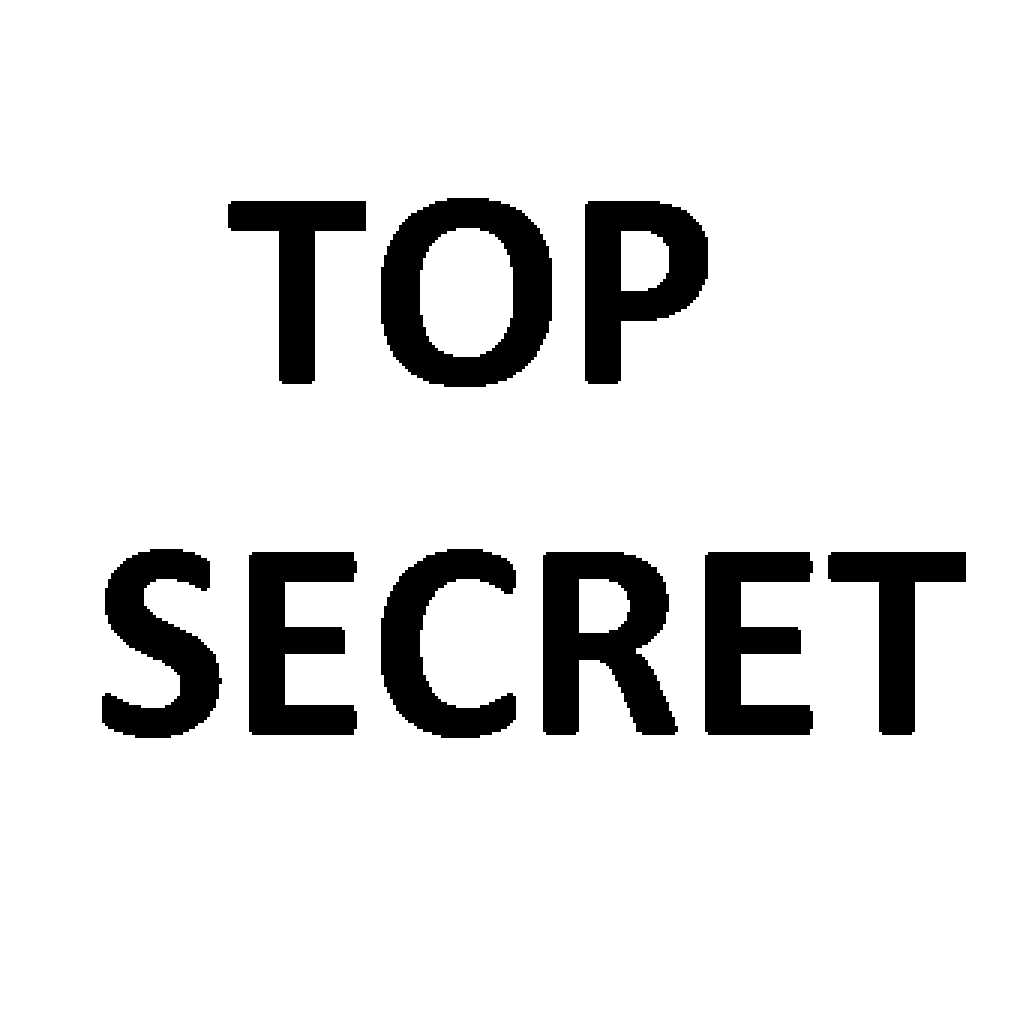

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Read RGB image
img = cv2.imread('sample.bmp') 
  
# Output img with window name as 'image'
print(img.shape)
cv2_imshow(img)

In [ ]:
stream=img.reshape((-1,1,1)).flatten()
hex_stream=""
for i in stream:
  if len(hex(i)[2:])==2:
    hex_stream+=hex(i)[2:]
  else:
    hex_stream+="0"
    hex_stream+=hex(i)[2:]
print(stream[0])
print(len(stream))
print(len(hex_stream))

255
3145728
6291456


## Encryption - ECB

In [ ]:
key="2e39c585ce4900d323ce29713bebe73a1be08a0cb22e9f1310fcc14ad4b9b23e"
round_keys=key_gen_n_key(key,256)
message=hex_stream
result_img_256=aes_ecb_multi_block_encrypt(message,round_keys)
#print("ECB 256 :",result)

6291456
6291456
226


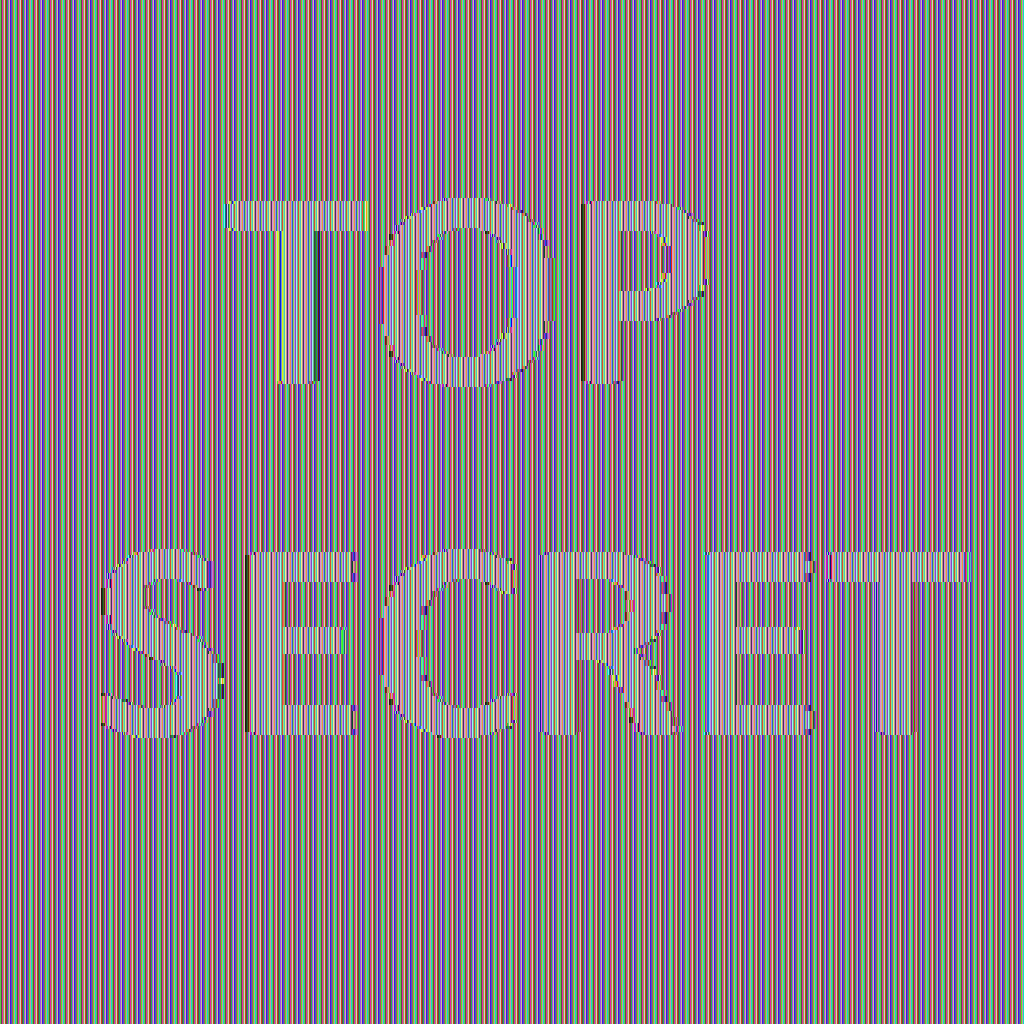

In [ ]:
print(len(hex_stream))
print(len(result_img_256[0]))
bytes_list=[]
for i in range(0,len(result_img_256[0]),2):
  bytes_list.append(int(result_img_256[0][i:i+2],16))
print(bytes_list[30])
image_flat=np.array(bytes_list,dtype=int)
image=image_flat.reshape(1024,1024,3)
cv2_imshow(image)

## Encryption - CBC

In [ ]:
key="9ddf3745896504ff360a51a3eb49c01b79fccebc71c3abcb94a949408b05b2c9"
iv="e79026639d4aa230b5ccffb0b29d79bc"
round_keys=key_gen_n_key(key,256)
message=hex_stream
result_img_256_cbc=aes_cbc_multi_block_encrypt(message,round_keys,iv)
print("CBC 256 :",result)



CBC 256 : ('cf52e5c3954c51b94c9e38acb8c9a7c791666971d3bd140fe7d05645da3320d3510ad45aecb453d30b9316072a3ebd473347a73024080eee9f43796943d829fbc38b21735edcad6381c34610563c90bcbc79a55a4caadaf3416e01249464e070bc598769899f04721177d02a6b09aee7', 0)


66


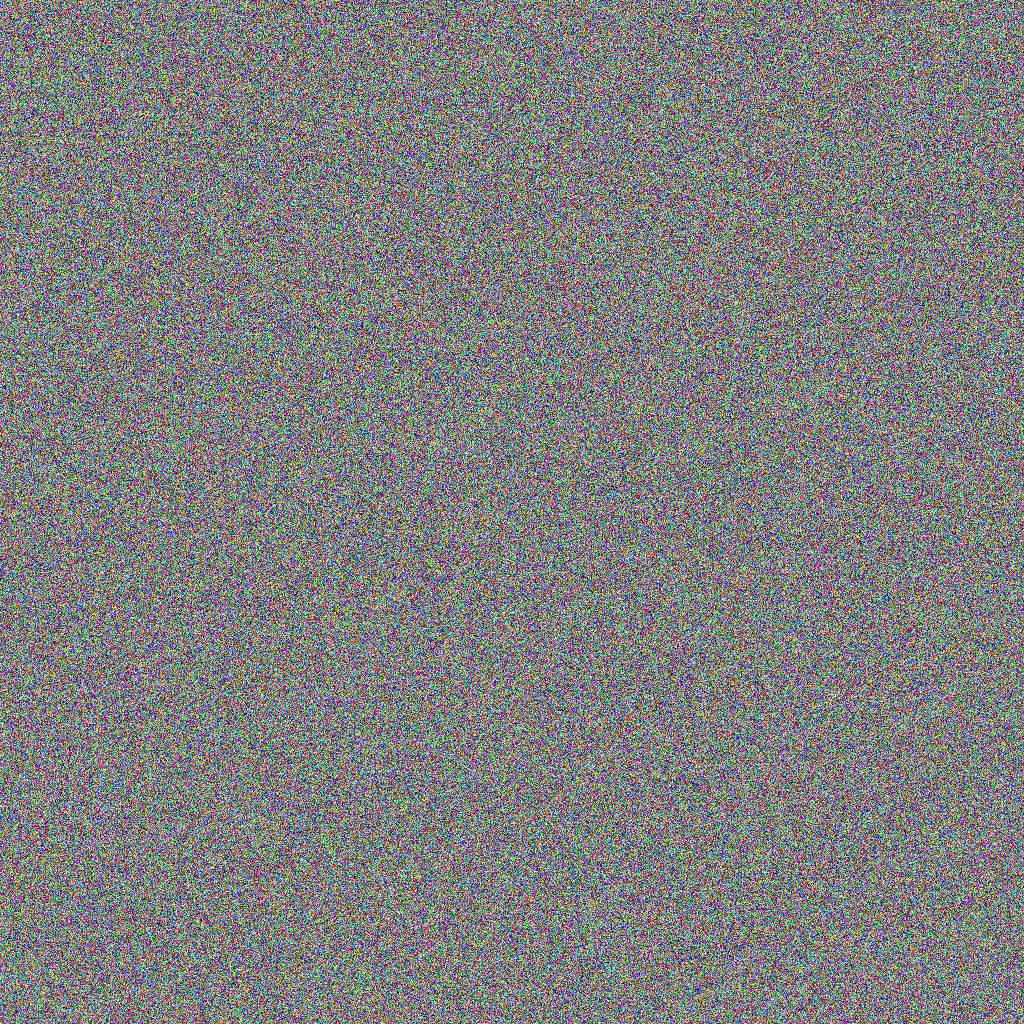

In [ ]:
bytes_list=[]
for i in range(0,len(result_img_256_cbc[0]),2):
  bytes_list.append(int(result_img_256_cbc[0][i:i+2],16))
print(bytes_list[30])
image_flat=np.array(bytes_list,dtype=int)
image=image_flat.reshape(1024,1024,3)
cv2_imshow(image)

## Decryption - ECB 

In [ ]:
key="2e39c585ce4900d323ce29713bebe73a1be08a0cb22e9f1310fcc14ad4b9b23e"
round_keys=key_gen_n_key(key,256) # generate key
message=hex_stream # message = long hexadecimal string of the image value
result_img_256_decrypt=aes_ecb_multi_block_decrypt(result_img_256[0],round_keys) # encrypt
#print("ECB 256 :",result)

255


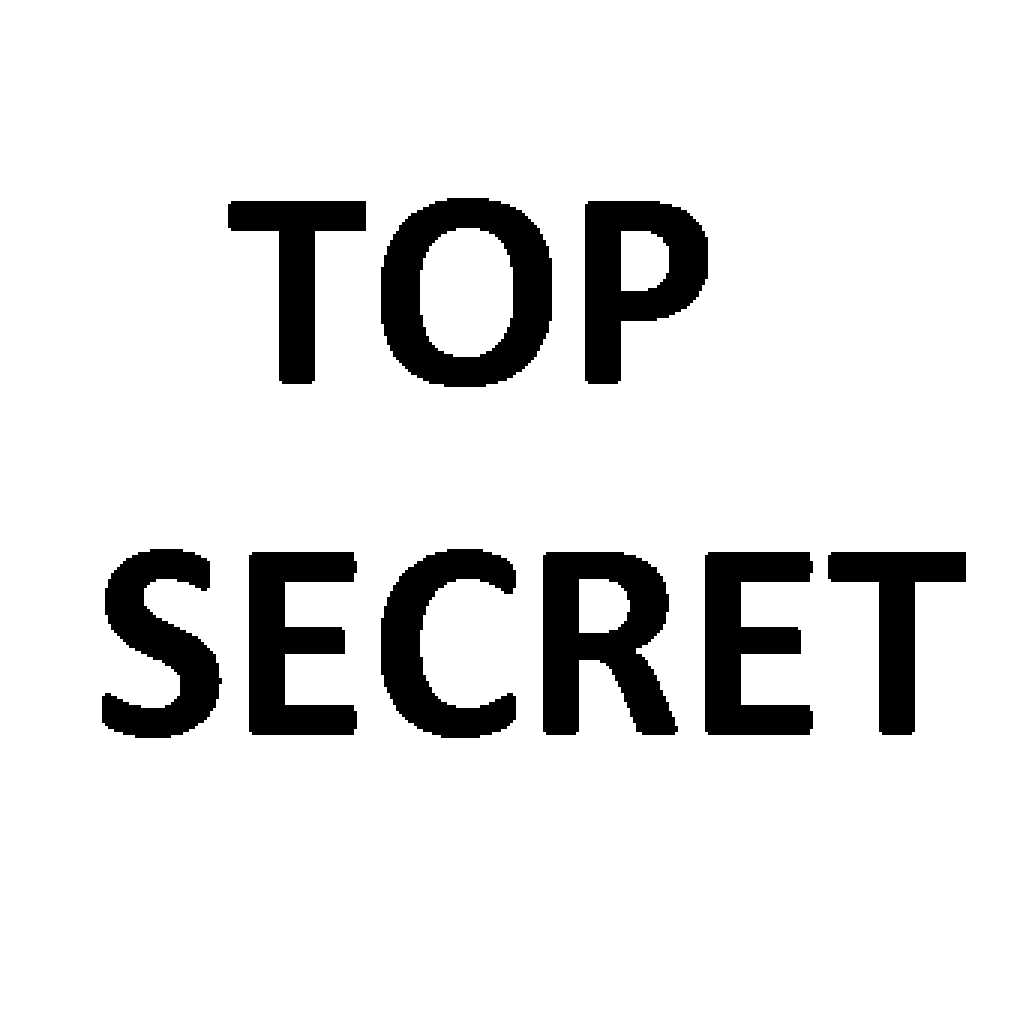

In [ ]:
# process image list
bytes_list=[]
for i in range(0,len(result_img_256_decrypt[0]),2): # read each byte in the flattened list
  bytes_list.append(int(result_img_256_decrypt[0][i:i+2],16)) # add them to a lsit
image_flat=np.array(bytes_list,dtype=int) # convert to numpy
image=image_flat.reshape(1024,1024,3) # reshape to get a valid image
cv2_imshow(image) # show image

## Decryption CBC

In [ ]:
key="2e39c585ce4900d323ce29713bebe73a1be08a0cb22e9f1310fcc14ad4b9b23e"
round_keys=key_gen_n_key(key,256)
message=hex_stream
result_img_256_decrypt_cbc=aes_ecb_multi_block_decrypt(result_img_256_cbc[0],round_keys)
#print("ECB 256 :",result)

# RSA

In [ ]:
from google.colab import files # upload file to colab
uploaded = files.upload()

Saving RSA_File_2048_Bits to RSA_File_2048_Bits


In [ ]:
import rsa
import time
start = time.time()
(public, private) = rsa.newkeys(2560) # generate keys
f = open("RSA_File_2048_Bits","rb") # read binary file
data = f.read()
f.close()
temp=rsa.encrypt(data, public) # encrypt
end=time.time()
print(f"RSA time {end-start}") # calculate execution time

RSA time 10.775288105010986


# Draft

In [ ]:
print(adv_multiply_hex(0xff ,'09'),adv_multiply_hex(0xff ,'0b'),adv_multiply_hex(0xff ,'0d'),adv_multiply_hex(0xff ,'0e'))

In [ ]:
multiply_column([0x0a ,0x10 ,0x95 ,0x9b])

In [ ]:
multiply_inv_column([0x2a, 0x15, 0x9d, 0xb6])

In [ ]:
"0x{:02x}".format(15)

In [ ]:
hex(0x0f ^ 0xff)
int_val=int('0x11',16)


hex_str = "0x11"
hex_int = int(hex_str, 16)
new_int = hex_int ^ 0x10
#print (hex(new_int))
#hex(5 ^ 0x01) #"0000 0011 0001 0001"

5 ^ 10

In [ ]:
hex_num=0xff
product=hex_num << 1
v=hex(product)
# 0011 0011
# 0110 0110
# "0x{:02x}".format
b=binary=bin(product)
if binary[2]==1:
  #hex_num=hex(product)
  #product=0 256+16+11
  print(product)
print(v,"\n",b,"\n",product)

In [ ]:
# hex_num=0x01
# new=hex_num << 7 
# print(new)
# binary=bin(new)
# binary[2]
0x11 ^ 0x00

In [ ]:
int_num=int("e2",16)
int_num

In [ ]:
rci="200" # 2^9
rc_int=int(rci,16)
if int(rci,16) > int("80",16):
  rc_int^=int("11b",16)
rcss=hex(rc_int)[2:]
rcss

In [ ]:
res=g("67204675",1)
print(res)
res=g("00000000",1)
res

In [ ]:
"37a1205ea929355d2e4ee52d5e1d9cda279ae01e640287ccb153276e7e0ecf2d633cf4f2b3afaecb548a2590ce0445c6a168bac3dc601813eb74591bb1ce8dfcd740cdbb6388719e8cd283d9cc7e736938240b410dd5a6a48ba49dd2066503e63ab592ffdf3be49e7d2de74f82158b8c"=="37a1205ea929355d2e4ee52d5e1d9cda279ae01e640287ccb153276e7e0ecf2d633cf4f2b3afaecb548a2590ce0445c6a168bac3dc601813eb74591bb1ce8dfcd740cdbb6388719e8cd283d9cc7e736938240b410dd5a6a48ba49dd2066503e63ab592ffdf3be49e7d2de74f82158b8c"

In [ ]:
"1e49e9541ed0f97023f8205e71fe75668680f12fb5902d7a11066d108c1adef960321cefaef8f71365b077de66c91e59e6b16c9113eea945fa6bdee3a80f25b38f9422512c97d260e7eb837d3b33247216b0bfac835744f08627884947b98d4573190460e0d410c170524d2437661118"=="1e49e9541ed0f97023f8205e71fe75668680f12fb5902d7a11066d108c1adef960321cefaef8f71365b077de66c91e59e6b16c9113eea945fa6bdee3a80f25b38f9422512c97d260e7eb837d3b33247216b0bfac835744f08627884947b98d4573190460e0d410c170524d2437661118"

In [ ]:
len("c88e03383ba9da6f982c057fe92c0bb3ed5b9cd18295a100e13a4e12d440b919bbb8b221abead362902ce44d30d0b80e56bee1f66a7d8de0b1e1b4dbf76c90c1807a3bc5f277e9814c82ab120f7e10217dfdf6092ce4958f8906c5e32279c6537dd1fbae20cb7a1d9f89d0490b6aefc155e494237d35c4354b94b9e1e6476557")

In [ ]:
len("807bc4ea684eedcfdcca30180680b0f1")